In [1]:
import pandas as pd
#Git_url
train_url = "https://github.com/neurone0/explore_data/raw/main/melbourne-housing-snapshot/Data/train.csv"
test_url = "https://github.com/neurone0/explore_data/raw/main/melbourne-housing-snapshot/Data/test.csv"

In [2]:
from sklearn.model_selection import train_test_split

train_data = pd.read_csv(train_url,index_col= "Id")
test_data = pd.read_csv(test_url,index_col= "Id")

In [3]:
# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0,subset=['SalePrice'],inplace= True)

In [4]:
y = train_data.SalePrice
train_data.drop(['SalePrice'],axis =1, inplace= True)


In [8]:
# Select numeric columns only
numeric_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64','float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor',SimpleImputer()),
    ('model',RandomForestRegressor(n_estimators=50, random_state= 0))
])

In [10]:
from sklearn.model_selection import cross_val_score
# Multiply by -1 since sklearn calculates *negative* MAE

scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


In [11]:
#Function
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

Use the function that you defined above to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.
 
Store your results in a Python dictionary results, where results[i] is the average MAE returned by get_score(i).

In [12]:
results = { i : get_score(i*50) for i in range(1,9)}

In [13]:
results

{1: np.float64(18353.8393511688),
 2: np.float64(18395.2151680032),
 3: np.float64(18288.730020956387),
 4: np.float64(18248.345889801505),
 5: np.float64(18255.26922247291),
 6: np.float64(18275.241922621914),
 7: np.float64(18270.29183308043),
 8: np.float64(18270.197974402367)}

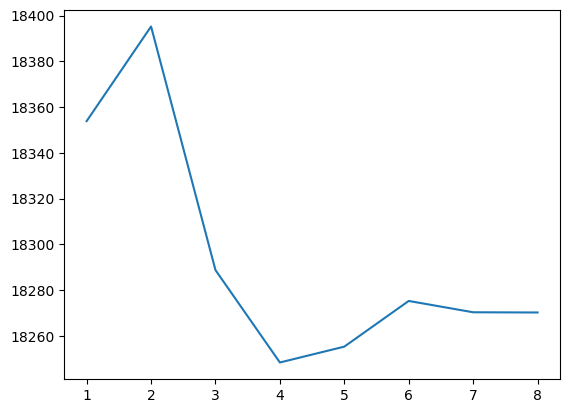

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [15]:
n_estimators_best = min(results, key=results.get)